In [16]:
data <- read.csv("./total.csv")
data <- data[,-1]
head(data,10)

,jur_stn,year,상반기,파출소수,경찰관수,X5대범죄발생건,X5대범죄검거건,X5대범죄검거율,전체인구,전체성비,⋯,교통사고발생건,평균출동시간,tot_f_safety,dept_safety,crime_safety,rob_satety_q1,mur_safety_q2,ta_safety_q3,raw_odder_q4,overall_q5
,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,마산동부경찰서,2017,0,7,185,2025,415.0,0.2049383,202864.0,100.9000,⋯,216,370,68.2,67.2,72.6,71.7,73.5,64.9,63.6,70.3
2,마산동부경찰서,2017,1,7,185,2025,412.0,0.2034568,202864.0,100.9000,⋯,165,370,69.5,68.8,75.8,74.6,77.0,64.0,65.7,71.2
3,마산동부경찰서,2018,0,7,185,2021,428.0,0.2117763,197683.0,100.8000,⋯,186,359,71.2,71.0,74.0,72.4,75.6,67.9,70.7,71.8
4,마산동부경찰서,2018,1,7,185,2021,411.0,0.2033647,197683.0,100.8000,⋯,203,359,72.1,71.9,77.5,76.0,79.0,67.5,70.0,72.6
5,마산동부경찰서,2019,0,7,185,1819,455.0,0.2501374,192446.0,100.3000,⋯,243,365,71.9,71.4,75.8,75.0,76.5,69.4,68.9,73.1
6,마산동부경찰서,2019,1,7,185,1819,396.0,0.2177020,192446.0,100.3000,⋯,213,365,71.7,71.4,77.2,76.1,78.2,66.4,69.9,72.4
7,마산동부경찰서,2020,0,7,185,1955,419.5,0.2152293,197664.3,100.6667,⋯,176,323,NA,NA,NA,NA,NA,NA,NA,NA
8,마산동부경찰서,2020,1,7,185,1955,419.5,0.2152293,197664.3,100.6667,⋯,206,323,NA,NA,NA,NA,NA,NA,NA,NA
9,마산중부경찰서,2017,0,8,142,1432,350.0,0.2444134,178751.0,100.1000,⋯,268,370,73.4,72.9,79.2,76.7,81.6,69.6,69.1,74.6


In [17]:
variables <- data[,4:37]
head(variables)

,파출소수,경찰관수,X5대범죄발생건,X5대범죄검거건,X5대범죄검거율,전체인구,전체성비,X0대.비율,X10대.비율,X20대.비율,⋯,X1인당.담당인구수,기초생활자수,지방세징수액,X1인가구비율,절폭신고비율,강살신고비율,교통신고비율,질서신고비율,교통사고발생건,평균출동시간
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,185,2025,415,0.2049383,202864,100.9,0.08137471,0.10252189,0.1222987,⋯,1096,0.14012343,279864,0.05341695,0.09011427,0.002271198,0.1420414,0.3479159,216,370
2,7,185,2025,412,0.2034568,202864,100.9,0.08137471,0.10252189,0.1222987,⋯,1096,0.04664209,279864,0.05341695,0.08861929,0.002043252,0.1429387,0.3553872,165,370
3,7,185,2021,428,0.2117763,197683,100.8,0.07750793,0.10115690,0.1204656,⋯,1068,0.15023548,251555,0.05422771,0.09653238,0.002563235,0.1511825,0.3580790,186,359
4,7,185,2021,411,0.2033647,197683,100.8,0.07750793,0.10115690,0.1204656,⋯,1068,0.14210630,251555,0.05422771,0.09377640,0.001689665,0.1450296,0.3835539,203,359
5,7,185,1819,455,0.2501374,192446,100.3,0.07366742,0.09706099,0.1180227,⋯,1040,0.17835653,266274,0.05596891,0.08714538,0.002767740,0.1358884,0.3337434,243,365
6,7,185,1819,396,0.2177020,192446,100.3,0.07366742,0.09706099,0.1180227,⋯,1040,0.17006329,266274,0.05596891,0.09517443,0.001712973,0.1501985,0.3259244,213,365


# 변수가 너무 많다는 판단 하에, PCA를 제대로 진행

# step1) Normalize

In [18]:
nor_sd = function(x){
  result = (x - mean(x)) / sd(x)
  return(result)
}

nor_minmax = function(x){
  result = (x - min(x)) / (max(x) - min(x))
  return(result)
}

norm_var = apply(variables,MARGIN = 2, FUN = "nor_sd")
head(norm_var)

파출소수,경찰관수,X5대범죄발생건,X5대범죄검거건,X5대범죄검거율,전체인구,전체성비,X0대.비율,X10대.비율,X20대.비율,⋯,X1인당.담당인구수,기초생활자수,지방세징수액,X1인가구비율,절폭신고비율,강살신고비율,교통신고비율,질서신고비율,교통사고발생건,평균출동시간
-0.3627713,-1.145991,0.6313226,-1.0073462,-2.950524,-0.7848717,0.8956447,0.39500160,0.8030644,-1.180131,⋯,0.25833674,0.003764627,-0.7849901,-1.531653,-0.08489144,-0.1866727,0.9403831,1.4963273,-1.251806,2.140091
-0.3627713,-1.145991,0.6313226,-1.0167777,-2.967600,-0.7848717,0.8956447,0.39500160,0.8030644,-1.180131,⋯,0.25833674,-1.538895247,-0.7849901,-1.531653,-0.21220513,-0.4226003,0.9763806,1.6841629,-1.432873,2.140091
-0.3627713,-1.145991,0.6252066,-0.9664768,-2.871707,-0.8237430,0.8738343,0.15049700,0.7153541,-1.255707,⋯,0.17530251,0.170636922,-0.8637826,-1.524697,0.46167943,0.1155888,1.3071037,1.7518374,-1.358316,1.885988
-0.3627713,-1.145991,0.6252066,-1.0199215,-2.968662,-0.8237430,0.8738343,0.15049700,0.7153541,-1.255707,⋯,0.17530251,0.036486583,-0.8637826,-1.524697,0.22697834,-0.7885682,1.0602613,2.3923005,-1.297960,1.885988
-0.3627713,-1.145991,0.3163450,-0.8815941,-2.429549,-0.8630344,0.7647824,-0.09234626,0.4521617,-1.356424,⋯,0.09226829,0.634699686,-0.8228151,-1.509757,-0.33772396,0.3272554,0.6935344,1.1400161,-1.155947,2.024590
-0.3627713,-1.145991,0.3163450,-1.0670785,-2.803406,-0.8630344,0.7647824,-0.09234626,0.4521617,-1.356424,⋯,0.09226829,0.497841992,-0.8228151,-1.509757,0.34603557,-0.7644443,1.2676268,0.9434394,-1.262457,2.024590


# step2) PCA

In [19]:
# 상관관계행렬을 통해서 eigen value를 도출함
# eigen value가 1이상인 값만 사용
eigen(cor(norm_var))

eigen() decomposition
$values
 [1] 9.052425e+00 6.459793e+00 5.295241e+00 2.622331e+00 2.054082e+00
 [6] 1.516685e+00 1.284858e+00 8.770257e-01 8.474905e-01 8.116092e-01
[11] 5.902389e-01 4.211651e-01 4.126885e-01 3.337093e-01 2.875700e-01
[16] 2.383550e-01 1.742244e-01 1.685572e-01 1.293103e-01 1.193174e-01
[21] 6.884294e-02 6.532376e-02 4.323008e-02 2.940470e-02 2.417761e-02
[26] 1.906807e-02 1.226777e-02 1.152509e-02 9.705077e-03 8.749708e-03
[31] 6.471497e-03 4.556318e-03 4.467308e-08 2.673448e-11

$vectors
              [,1]         [,2]        [,3]         [,4]         [,5]
 [1,] -0.058868308 -0.164995392 -0.11573092  0.071918134  0.327780875
 [2,] -0.211502814 -0.192943174 -0.22877181 -0.069669396  0.095455188
 [3,] -0.116554854 -0.135325844 -0.31863515  0.028454722  0.030091306
 [4,] -0.149091352 -0.173374010 -0.30196201 -0.012814346 -0.042339997
 [5,] -0.104014129 -0.111069200  0.03306763 -0.121935138 -0.235486470
 [6,] -0.092066703 -0.097562028 -0.34418419 -0.206221077  0.125

In [20]:
norm_PCA <- prcomp(norm_var)
summary(norm_PCA)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     3.0087 2.5416 2.3011 1.61936 1.43321 1.23154 1.13352
Proportion of Variance 0.2662 0.1900 0.1557 0.07713 0.06041 0.04461 0.03779
Cumulative Proportion  0.2662 0.4562 0.6120 0.68911 0.74953 0.79413 0.83192
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.93650 0.92059 0.90089 0.76827 0.64897 0.64241 0.57768
Proportion of Variance 0.02579 0.02493 0.02387 0.01736 0.01239 0.01214 0.00981
Cumulative Proportion  0.85772 0.88265 0.90652 0.92388 0.93626 0.94840 0.95822
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     0.53626 0.48822 0.41740 0.41056 0.3596 0.34542 0.26238
Proportion of Variance 0.00846 0.00701 0.00512 0.00496 0.0038 0.00351 0.00202
Cumulative Proportion  0.96667 0.97368 0.97881 0.98377 0.9876 0.99108 0.99310
                          PC22    PC23    

In [21]:
norm_PCA

Standard deviations (1, .., p=34):
 [1] 3.008725e+00 2.541612e+00 2.301139e+00 1.619361e+00 1.433207e+00
 [6] 1.231538e+00 1.133516e+00 9.364965e-01 9.205925e-01 9.008936e-01
[11] 7.682701e-01 6.489723e-01 6.424084e-01 5.776758e-01 5.362556e-01
[16] 4.882161e-01 4.174020e-01 4.105572e-01 3.595974e-01 3.454235e-01
[21] 2.623794e-01 2.555851e-01 2.079184e-01 1.714780e-01 1.554915e-01
[26] 1.380872e-01 1.107600e-01 1.073550e-01 9.851435e-02 9.353988e-02
[31] 8.044562e-02 6.750050e-02 2.113601e-04 5.170508e-06

Rotation (n x k) = (34 x 34):
                                  PC1          PC2         PC3          PC4
파출소수                  0.058868308  0.164995392 -0.11573092  0.071918134
경찰관수                  0.211502814  0.192943174 -0.22877181 -0.069669396
X5대범죄발생건            0.116554854  0.135325844 -0.31863515  0.028454722
X5대범죄검거건            0.149091352  0.173374010 -0.30196201 -0.012814346
X5대범죄검거율            0.104014129  0.111069200  0.03306763 -0.121935138
전체인구                  0.092

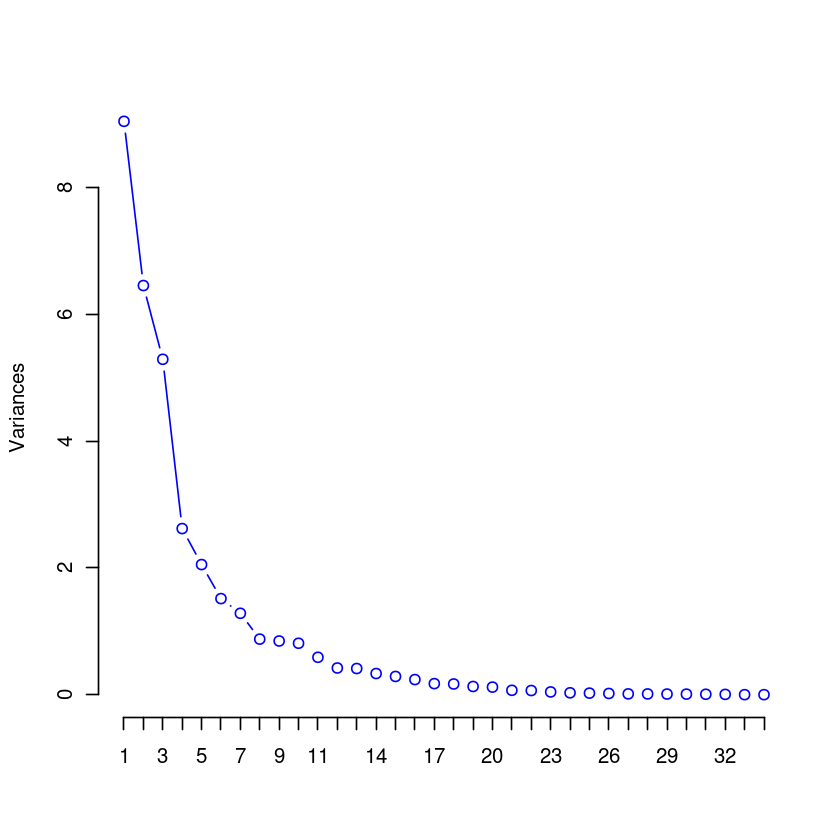

In [22]:
screeplot(norm_PCA, main = "", col = "blue", type = "lines", pch = 1, npcs = length(norm_PCA$sdev)) 

In [23]:
norm_PCA$sdev

[1] 3.008725e+00 2.541612e+00 2.301139e+00 1.619361e+00 1.433207e+00
 [6] 1.231538e+00 1.133516e+00 9.364965e-01 9.205925e-01 9.008936e-01
[11] 7.682701e-01 6.489723e-01 6.424084e-01 5.776758e-01 5.362556e-01
[16] 4.882161e-01 4.174020e-01 4.105572e-01 3.595974e-01 3.454235e-01
[21] 2.623794e-01 2.555851e-01 2.079184e-01 1.714780e-01 1.554915e-01
[26] 1.380872e-01 1.107600e-01 1.073550e-01 9.851435e-02 9.353988e-02
[31] 8.044562e-02 6.750050e-02 2.113601e-04 5.170508e-06

In [24]:
PCA_data <- as.data.frame(norm_PCA$x)
write.csv(PCA_data,"PCA.csv")

# 다중회귀분석 진행
-> eigen value가 1이상인 값만 사용하는 걸로 해서, 진행 7개변수로 진행함.

In [25]:
target <- c("rob_satety_q1","mur_safety_q2","ta_safety_q3","raw_odder_q4","overall_q5")


In [26]:
dataset <- norm_PCA$x
dataset <- as.data.frame(dataset)
question <- target[5]

# new_dataset
new_dataset <- dataset
new_dataset[question] <- data[question]
#head(new_dataset)
new_dataset <- new_dataset[is.na(new_dataset[question]) == FALSE,]

colSums(is.na(new_dataset))


PC1        PC2        PC3        PC4        PC5        PC6        PC7 
         0          0          0          0          0          0          0 
       PC8        PC9       PC10       PC11       PC12       PC13       PC14 
         0          0          0          0          0          0          0 
      PC15       PC16       PC17       PC18       PC19       PC20       PC21 
         0          0          0          0          0          0          0 
      PC22       PC23       PC24       PC25       PC26       PC27       PC28 
         0          0          0          0          0          0          0 
      PC29       PC30       PC31       PC32       PC33       PC34 overall_q5 
         0          0          0          0          0          0          0

In [27]:
formula <- paste(question, "~", "PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7")
formula


[1] "overall_q5 ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7"

In [28]:
model <- lm(formula, data = new_dataset)
summary(model)


Call:
lm(formula = formula, data = new_dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0940 -1.5677  0.0793  1.4655  6.3364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 73.42814    0.14468 507.530  < 2e-16 ***
PC1          0.29773    0.04730   6.295 1.47e-09 ***
PC2         -0.58895    0.05577 -10.560  < 2e-16 ***
PC3          0.30672    0.06141   4.994 1.14e-06 ***
PC4         -0.23167    0.08881  -2.609  0.00967 ** 
PC5         -0.32752    0.09978  -3.282  0.00118 ** 
PC6          0.34374    0.11638   2.954  0.00346 ** 
PC7         -0.25368    0.12803  -1.981  0.04869 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.256 on 238 degrees of freedom
Multiple R-squared:  0.4697,	Adjusted R-squared:  0.4541 
F-statistic: 30.11 on 7 and 238 DF,  p-value: < 2.2e-16


In [29]:
#1) 정규성

shapiro.test(residuals(model))
# 2) 독립성 0> Durbin watson
# p-value가 0.05보다 크므로, 귀무가설을 기각하지 못함-> 독립성을 만족

library(lmtest)
dwtest(model)

# 3) 등분산성
# 귀무가설을 기각하지 못함 (귀무가설: 등분산이다 vs 귀무가설: 등분산이 아니다.)

bptest(model)

# 4) 잔차의 기댓값이 0 -> 만족
round(mean(residuals(model)),5)


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.99789, p-value = 0.9882


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Durbin-Watson test

data:  model
DW = 1.6885, p-value = 0.002184
alternative hypothesis: true autocorrelation is greater than 0



	studentized Breusch-Pagan test

data:  model
BP = 23.439, df = 7, p-value = 0.001429


[1] 0

# 잔차 분석에 모두가 만족하지 않음(1~5)

# 배리맥스로 회전 기법사용

In [30]:
library("psych")

In [31]:
Varimax <- principal(norm_var,7,rotate="varimax",scores=TRUE, method="regression" )


In [32]:
norm_varimax <- predict(Varimax, norm_var)

In [33]:
target <- c("rob_satety_q1","mur_safety_q2","ta_safety_q3","raw_odder_q4","overall_q5")
dataset <- norm_varimax
dataset <- as.data.frame(dataset)

# target
question <- target[5]

dataset[question] <- data[question]
head(dataset)

formula <- paste(question, "~", "RC1 + RC2 + RC3 + RC4 + RC5 + RC6 + RC7")
formula


,RC1,RC3,RC2,RC6,RC4,RC5,RC7,overall_q5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.318559,-0.4265929,0.4831633,1.369423,-0.9721411,-0.9647506,-1.442766,70.3
2,1.253455,-0.4939206,0.7682039,1.340715,-0.8337042,-1.1169614,-1.376336,71.2
3,1.420451,-0.4159300,0.3389797,1.349164,-1.0606020,-1.0721782,-1.447237,71.8
4,1.417568,-0.4177923,0.3760929,1.400003,-1.0439682,-1.1812471,-1.624963,72.6
5,1.401930,-0.4644894,-0.1228962,1.242020,-1.2534942,-1.1423055,-1.411968,73.1
6,1.389117,-0.4808806,-0.1286568,1.377504,-1.1011922,-1.1440583,-1.953473,72.4


[1] "overall_q5 ~ RC1 + RC2 + RC3 + RC4 + RC5 + RC6 + RC7"

In [34]:
model <- lm(formula, data = dataset)
summary(model)


Call:
lm(formula = formula, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0940 -1.5677  0.0793  1.4655  6.3364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 73.42814    0.14468 507.530  < 2e-16 ***
RC1         -1.63745    0.14060 -11.646  < 2e-16 ***
RC2          0.48212    0.14176   3.401 0.000787 ***
RC3         -0.36166    0.14316  -2.526 0.012181 *  
RC4         -0.99703    0.14353  -6.946 3.55e-11 ***
RC5         -0.12569    0.14303  -0.879 0.380407    
RC6         -0.02864    0.14328  -0.200 0.841743    
RC7         -0.33022    0.14528  -2.273 0.023918 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.256 on 238 degrees of freedom
  (82 observations deleted due to missingness)
Multiple R-squared:  0.4697,	Adjusted R-squared:  0.4541 
F-statistic: 30.11 on 7 and 238 DF,  p-value: < 2.2e-16


In [35]:
#1) 정규성

shapiro.test(residuals(model))
# 2) 독립성 0> Durbin watson
# p-value가 0.05보다 크므로, 귀무가설을 기각하지 못함-> 독립성을 만족

#library(lmtest)
dwtest(model)

# 3) 등분산성
# 귀무가설을 기각하지 못함 (귀무가설: 등분산이다 vs 귀무가설: 등분산이 아니다.)

bptest(model)

# 4) 잔차의 기댓값이 0 -> 만족
round(mean(residuals(model)),5)


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.99789, p-value = 0.9882



	Durbin-Watson test

data:  model
DW = 1.6885, p-value = 0.002184
alternative hypothesis: true autocorrelation is greater than 0



	studentized Breusch-Pagan test

data:  model
BP = 23.439, df = 7, p-value = 0.001429


[1] 0

In [36]:
write.csv(norm_varimax,"varimax.csv")

# 결론: 잔차분석에서 모두 실패